### Thư viện


In [8]:
import os
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Train


In [9]:
# Đường dẫn đến thư mục chứa dữ liệu
data_processing_dir = "./Data_set/Data_train/"


# Xác định các đặc trưng (features) và nhãn (labels)
features = ["Gx", "Gy", "Gz", "Ax", "Ay", "Az"]

# Chuẩn bị dữ liệu huấn luyện
train_data = []
train_labels = []

# Đọc dữ liệu từ thư mục Data_processing
for file_name in os.listdir(data_processing_dir):
    if file_name.endswith("_0.csv"):
        label = 0  # Nhãn nữ
    elif file_name.endswith("_1.csv"):
        label = 1  # Nhãn nam
    else:
        continue

    file_path = os.path.join(data_processing_dir, file_name)
    df = pd.read_csv(file_path)
    flattened_data = df[features].values.flatten()  # Chuyển đổi dữ liệu thành 2 chiều
    train_data.append(flattened_data)
    train_labels.append(label)

# Xây dựng mô hình SVM
svm_model = SVC(kernel='poly')
svm_model.fit(train_data, train_labels)

SVC(kernel='poly')

### Test

In [10]:
test_path = "./Data_set/Data_test/"

test_data = []
test_filenames = []
test_labels = []

# Duyệt qua các tệp tin trong thư mục test_path
for filename in os.listdir(test_path):
    # Kiểm tra nếu tệp tin có đuôi .csv
    if filename.endswith(".csv"):
        file_path = os.path.join(test_path, filename)
        df = pd.read_csv(file_path)
        
        # Lấy dữ liệu từ 6 cột Gx, Gy, Gz, Ax, Ay, Az
        features = df[['Gx', 'Gy', 'Gz', 'Ax', 'Ay', 'Az']].values
        test_data.append(features)  # Thêm dữ liệu vào test_data
        test_filenames.append(filename)  # Thêm tên tệp tin vào test_filenames
        test_labels.append(0 if filename.endswith("_0.csv") else 1)  # Thêm nhãn vào test_labels (0: nữ, 1: nam)

test_data = np.array(test_data).reshape(len(test_data), -1)  # Chuyển đổi test_data thành mảng numpy 2D

predictions = svm_model.predict(test_data)  # Dự đoán giới tính trên dữ liệu kiểm tra

# In kết quả dự đoán và tên tệp tin tương ứng
for filename, label, prediction in zip(test_filenames, test_labels, predictions):
    print("File:", filename)
    print("Dự đoán giới tính:", prediction)
    print("--------------------")

accuracy = accuracy_score(test_labels, predictions)  # Tính độ chính xác bằng cách so sánh nhãn thực tế và nhãn dự đoán
print("Độ chính xác của mô hình SVM trên dữ liệu kiểm tra: {:.10f}%".format(accuracy * 100))

File: ID000104_Walk2_1.csv
Dự đoán giới tính: 0
--------------------
File: ID002630_Walk2_0.csv
Dự đoán giới tính: 0
--------------------
File: ID002838_Walk2_1.csv
Dự đoán giới tính: 1
--------------------
File: ID002942_Walk2_1.csv
Dự đoán giới tính: 1
--------------------
File: ID004636_Walk2_0.csv
Dự đoán giới tính: 0
--------------------
File: ID005431_Walk2_0.csv
Dự đoán giới tính: 0
--------------------
File: ID005535_Walk2_1.csv
Dự đoán giới tính: 1
--------------------
File: ID005639_Walk2_0.csv
Dự đoán giới tính: 0
--------------------
File: ID008440_Walk2_1.csv
Dự đoán giới tính: 0
--------------------
File: ID009443_Walk2_1.csv
Dự đoán giới tính: 0
--------------------
File: ID009547_Walk2_0.csv
Dự đoán giới tính: 0
--------------------
File: ID009859_Walk2_0.csv
Dự đoán giới tính: 1
--------------------
File: ID010002_Walk2_0.csv
Dự đoán giới tính: 0
--------------------
File: ID013635_Walk2_0.csv
Dự đoán giới tính: 0
--------------------
File: ID013843_Walk2_0.csv
Dự đoán


### lose func


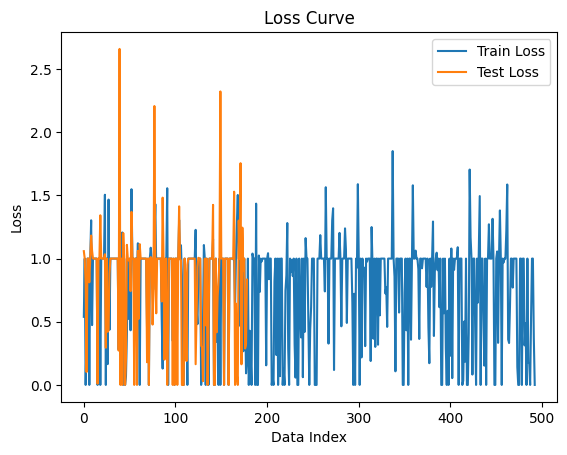

In [11]:
# Xác định hàm mất mát
def compute_loss(model, data, labels):
    loss = model.decision_function(data) * labels
    loss = np.maximum(0, 1 - loss)
    return np.mean(loss)

# Tính toán và vẽ biểu đồ hàm mất mát
train_loss = []
test_loss = []

for i, data in enumerate(train_data):
    train_loss.append(compute_loss(svm_model, data.reshape(1, -1), train_labels[i]))

for i, data in enumerate(test_data):
    test_loss.append(compute_loss(svm_model, data.reshape(1, -1), test_labels[i]))

plt.plot(range(len(train_loss)), train_loss, label='Train Loss')
plt.plot(range(len(test_loss)), test_loss, label='Test Loss')
plt.xlabel('Data Index')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()